## Obtención de data


- `wget https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Danone+Hackathon+Mexico/data/test_products.json`

- `wget https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Danone+Hackathon+Mexico/data/train_products.json`

Leer los archivos JSON

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
# Models
from sklearn.tree import DecisionTreeClassifier
# Acurracy
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc

In [2]:
with open('./data/test_products.json', 'r') as raw_test_data:
    raw = raw_test_data.read()
    test_data_json = json.loads(raw)

with open('./data/train_products.json', 'r') as raw_train_data:
    raw = raw_train_data.read()
    train_data_json = json.loads(raw)

In [3]:
data_train = [train_data_json[data_idx] for data_idx in train_data_json.keys()]
train_data = pd.DataFrame(data_train)
data_test = [test_data_json[data_idx] for data_idx in test_data_json.keys()]
test_data = pd.DataFrame(data_test)

In [ ]:
train_data['len_packaging'] = train_data['packaging_materials'].apply(len)
test_data['len_packaging'] = test_data['packaging_materials'].apply(len)

In [6]:
X_train = train_data[['non_recyclable_and_non_biodegradable_materials_count', 'is_beverage',
                      'est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution',
                      'est_co2_packaging', 'est_co2_processing', 'est_co2_transportation',
                      'len_packaging'
                      ]]
X = X_train.to_numpy()
y_train = train_data['ecoscore_grade']
y = y_train.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Inicializar modelos
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

# Predicciones de los modelos
y_pred_decision_tree = decision_tree.predict(X_test)

# F1-score
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

# Matriz de confusión
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Precisión
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

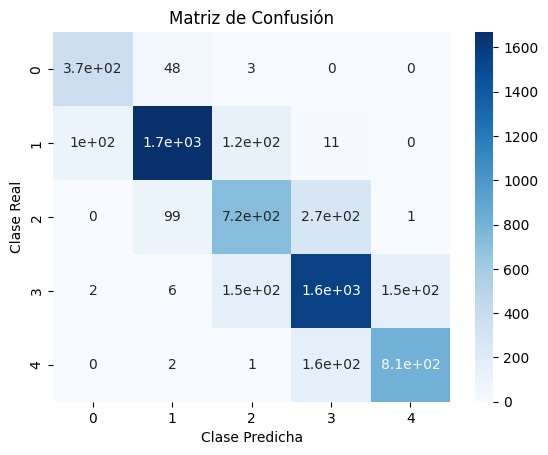

In [10]:
# Matriz de confusion
sns.heatmap(cm_decision_tree, annot=True, cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
decision_tree = DecisionTreeClassifier()

X_test = test_data[['non_recyclable_and_non_biodegradable_materials_count', 'is_beverage',
                    'est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution',
                    'est_co2_packaging', 'est_co2_processing', 'est_co2_transportation',
                    'len_packaging'
                    ]]
X_test = X_test.to_numpy()

decision_tree.fit(X, y)


# Predicciones de los modelos
y_pred_decision_tree = decision_tree.predict(X_test)
data = pd.DataFrame(y_pred_decision_tree, columns=['target'])

data.to_json('predictions.json')